Adds a noisy sine wave simulator

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import time
%matplotlib inline

In [74]:
class SimulatedSensor():
    """Class for simulated sensor."""

    def __init__(self, name, unit_of_measurement, period_s, seed):
        """Initialize the sensor."""
        self._name = name
        self._unit_of_measurement = unit_of_measurement
        self._seed = seed
        self._state = None
        self._start_time = dt.datetime.now()
        self._mean = None # The mean level
        self._amplitude = 1.0 # The wave amplitude
        self._period_s = dt.timedelta(seconds=period_s)  # The time period in seconds
        self._noise = None # % (percent) of the amplitude

    @property
    def name(self):
        """Return the name of the sensor."""
        return self._name

    @property
    def state(self):
        """Return the state of the sensor."""
        return self._state

    @property
    def icon(self):
        """Icon to use in the frontend, if any."""
        return ICON
    
    def update(self):
        """Update the sensor."""
        elapsed_time_s = (dt.datetime.now() - self._start_time).seconds
        
        elapsed_periods = int(self.safe_division(elapsed_time_s, self._period_s.seconds))
        phase = self.safe_division(
                self._period_s.seconds, elapsed_time_s - (elapsed_periods*self._period_s.seconds))
        self._state = self._amplitude*np.sin(phase*2*np.pi) #np.random.random()
        
    def safe_division(self, x, y):
        if y == 0:
            return 0
        return x / y

    @property
    def unit_of_measurement(self):
        """Return the unit this state is expressed in."""
        return self._unit_of_measurement

    @property
    def device_state_attributes(self):
        """Return other details about the sensor state."""
        attr = {
            'seed': self._seed,
            'start_time': self._start_time,
            }
        return attr

In [71]:
name = 'simulated_sine'
unit_of_measurement = None
period_s = 60
seed = 100

In [72]:
readings = []
sensor1 = SimulatedSensor(name, unit_of_measurement, period_s, seed)
for i in range(period_s):
    sensor1.update()
    readings.append(sensor1.state)
    time.sleep(1)

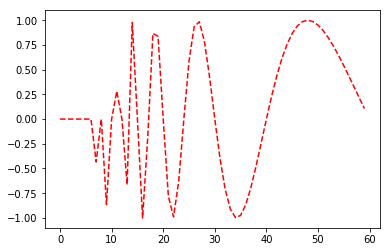

In [73]:
plt.plot(readings, 'r--');

In [6]:
sensor1.device_state_attributes

{'seed': 100,
 'start_time': datetime.datetime(2018, 2, 13, 8, 2, 27, 731064),
 'update_time': datetime.datetime(2018, 2, 13, 8, 2, 30, 43452)}